#  IRIS Classifier Model

# Understand the problem statement

As a data scientist, we have extensive knowledge of the Iris dataset, 
consisting of three classes, each with 50 instances. 
These classes represent different species of Iris flowers. 
The primary goal is to construct a classifier model utilizing 
advanced data science techniques. In pursuit of this objective, 
I am experimenting with various algorithms and their parameters to optimize the model's accuracy.

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'xgboost'

In [9]:
#load and make the copy of Iris dataset to keep track of changes.
df = pd.read_csv('Iris.csv') #read comma seperated values
df_copy=df.copy() #copy dataset

In [8]:
import os 
current_directory = os.getcwd()
print(current_directory)

C:\Users\Harish


In [10]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
#fetch first five rows from dataset
df_copy

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Attribute Information:
####    Id----> Id represents each record uniquely(int) 
####    SepalLengthCm---->Sepal lenght in centimeter(float)
####   SepalWidthCm---->Sepal Width in centimeter(float) 
####   PetalLengthCm---->Peatal lenght in cm(float)
####   PetalWidthCm---->Petal width in cm(float) 
####   Species----> Types of species of iris flower like setosa,versicolor,verginica(object)

# Check data properties and Data cleaning or preprocessing

In [17]:
#check number of records and feilds present in dataset
print('Number of rows:',df_copy.shape[0])
print('Number of Columns:',df_copy.shape[1])
print('----------------------------------------------------')
print(df_copy.select_dtypes(include=np.number).columns)
print('--------------------------------------------------------')
print(df_copy.select_dtypes(exclude=np.number).columns)

Number of rows: 150
Number of Columns: 6
----------------------------------------------------
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
--------------------------------------------------------
Index(['Species'], dtype='object')


In [18]:
# Calculate five-point summary for numerical variables
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
df_copy.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [21]:
# Summarize observations for categorical variables – no. of categories, % observations in each category
for i in df_copy.select_dtypes(exclude=np.number):
    print(df_copy[i].value_counts(normalize=True))
    print('------------------------------------------------------')

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64
------------------------------------------------------


In [24]:
df_copy.columns = ['Id','sl','sw','pl','pw','species']
df_split_iris=df_copy.species.str.split('-',n=-1,expand=True) #Remove prefix 'Iris-' from species col
df_split_iris.drop(columns=0,axis=1,inplace=True)#Drop 'Iris-' col
df_split_iris

,1
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [25]:
df3_full=df_copy.join(df_split_iris)
df3_full

,Id,sl,sw,pl,pw,species,1
0,1,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [26]:
df3_full.rename({1:'species1'},axis=1,inplace=True) #Rename column
df3_full

,Id,sl,sw,pl,pw,species,species1
0,1,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [27]:
df3_full.drop(columns='species',axis=1,inplace=True) #Drop excessive column

In [28]:
#final dataframe
df3_full

,Id,sl,sw,pl,pw,species1
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [29]:
df3_full.shape #check propertise like shape

(150, 6)

In [30]:
#check for missing entries
df3_full.isna() 

,Id,sl,sw,pl,pw,species1
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [31]:
#In each feat,count of missing entries
df3_full.isna().sum()

Id          0
sl          0
sw          0
pl          0
pw          0
species1    0
dtype: int64

In [32]:
df3_full.corr() # check the correlation matrix

,Id,sl,sw,pl,pw
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
sl,0.716676,1.000000,-0.109369,0.871754,0.817954
sw,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
pl,0.882747,0.871754,-0.420516,1.000000,0.962757
pw,0.899759,0.817954,-0.356544,0.962757,1.000000


In [33]:
#statistical description of numerical  data only
df3_full.describe()

,Id,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# check for balanced or unbalanced?

In [34]:
#categoriwise frequency of data
df3_full.species1.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species1, dtype: int64

# Data Visualisation and gain meaningfull insights from data

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


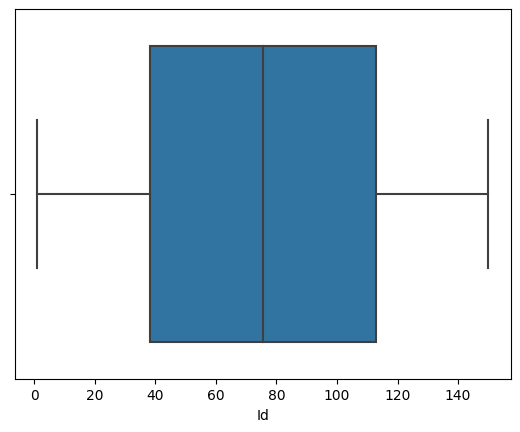

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


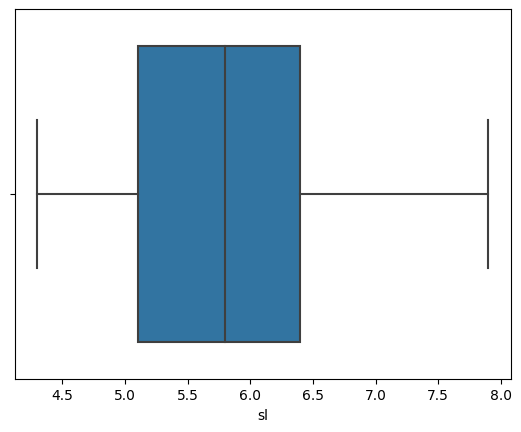

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


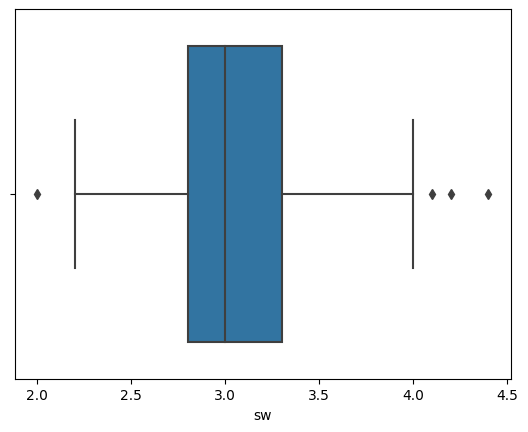

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


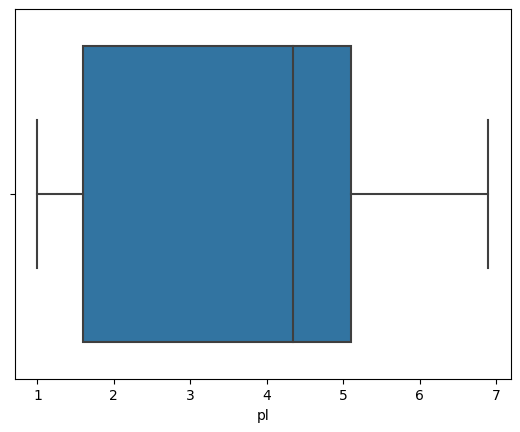

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


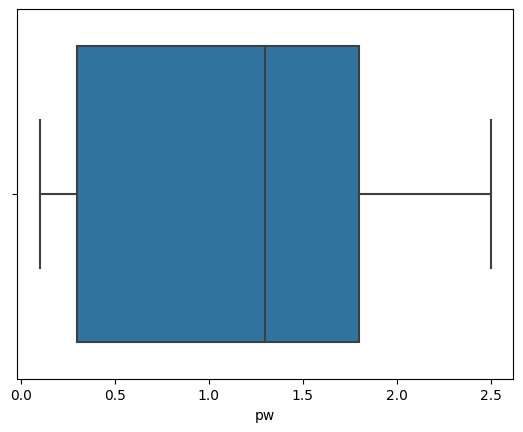

In [35]:
for i in df_copy.select_dtypes(include=np.number):
    sns.boxplot(df_copy[i])
    plt.show()

Id
Skew: 0.0


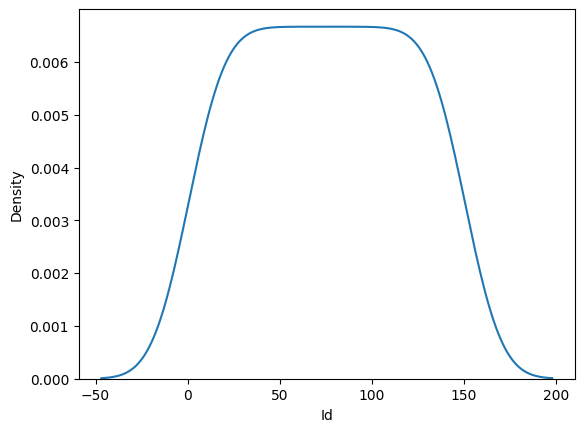

sl
Skew: 0.3149109566369728


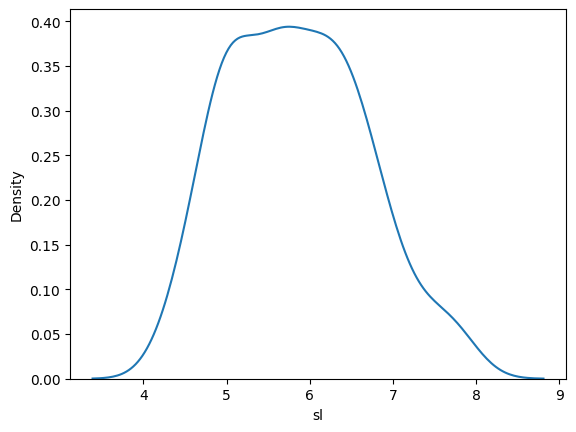

sw
Skew: 0.3340526621720866


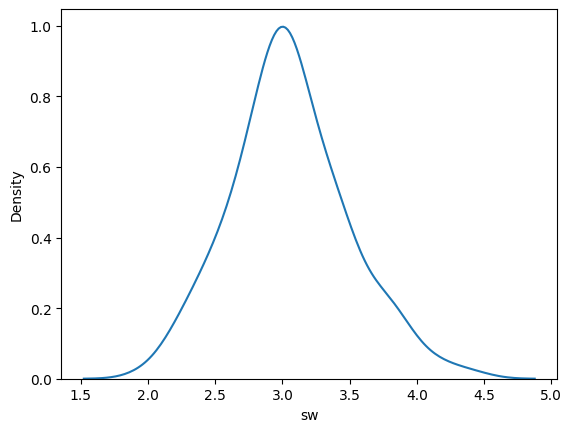

pl
Skew: -0.27446425247378287


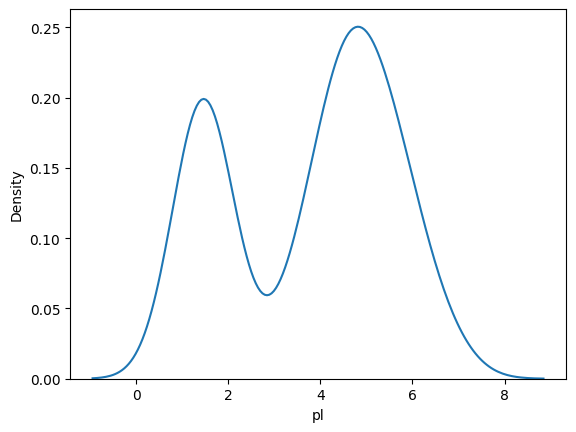

pw
Skew: -0.10499656214412734


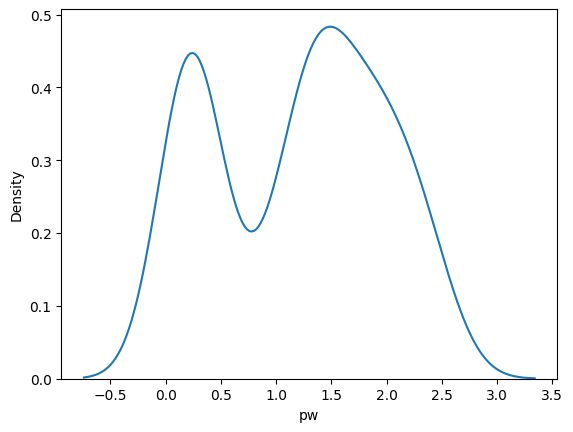

In [36]:
# Is the data normally distributed? Is it a defect? Why or why not?
for i in df_copy.select_dtypes(include=np.number):
    print(i)
    sns.kdeplot(df_copy[i])
    print('Skew:',df_copy[i].skew())
    plt.show()

In [37]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


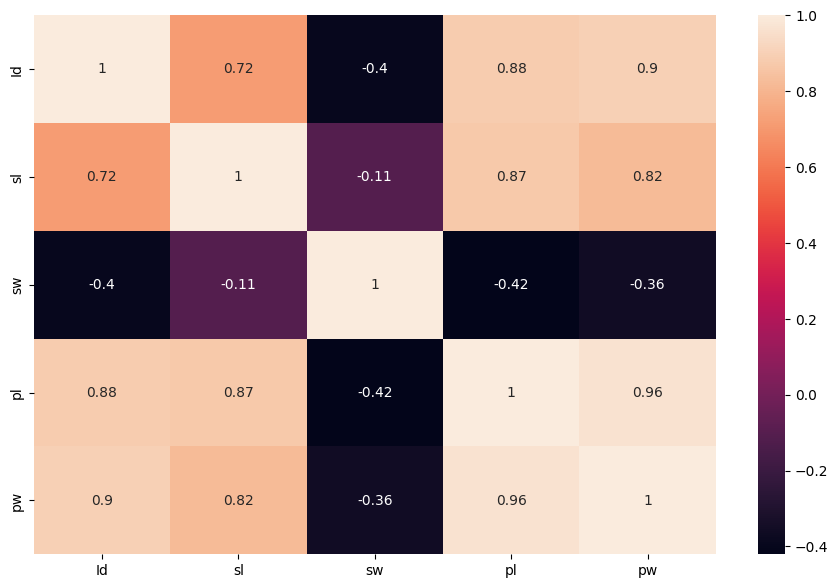

In [38]:
plt.figure(figsize=(11,7))
sns.heatmap(df_copy.corr(),annot=True)
plt.show()

In [43]:
df3_full

,Id,sl,sw,pl,pw,species1
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='species1', ylabel='sl'>

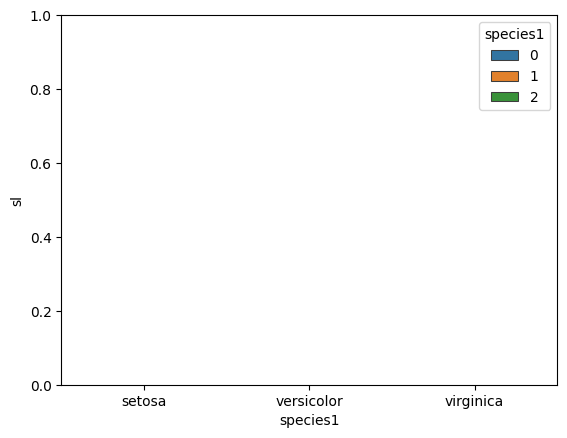

In [47]:
sns.boxplot(x=df3_full.species1,y=df3_full.sl,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])

<Axes: xlabel='species1', ylabel='sw'>

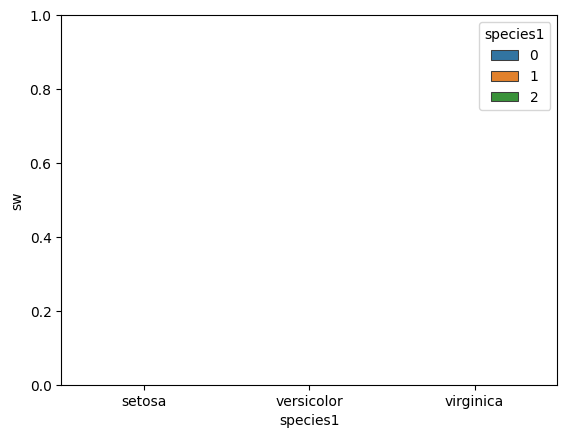

In [42]:
sns.boxplot(x=df3_full.species1,y=df3_full.sw,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])


<Axes: xlabel='species1', ylabel='pl'>

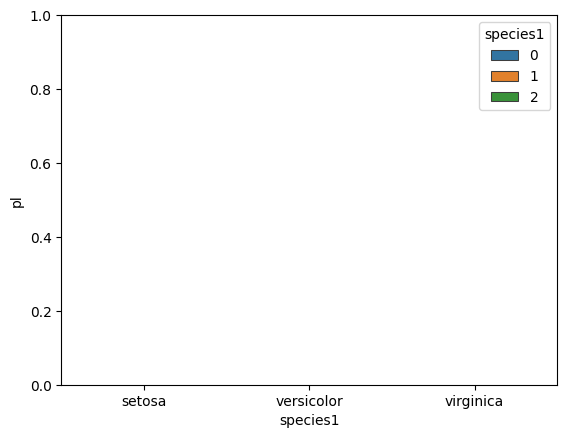

In [48]:
sns.boxplot(x=df3_full.species1,y=df3_full.pl,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])


<Axes: xlabel='species1', ylabel='pw'>

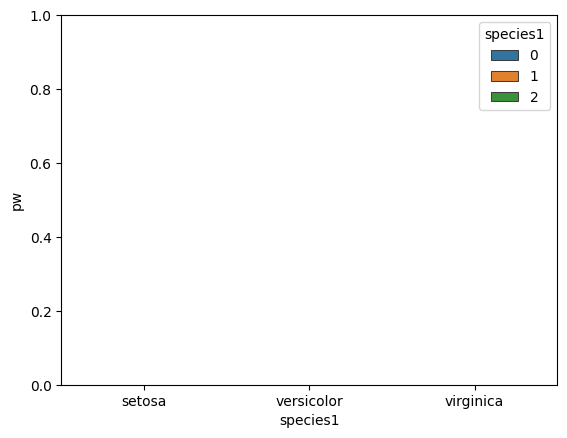

In [49]:
sns.boxplot(x=df3_full.species1,y=df3_full.pw,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])

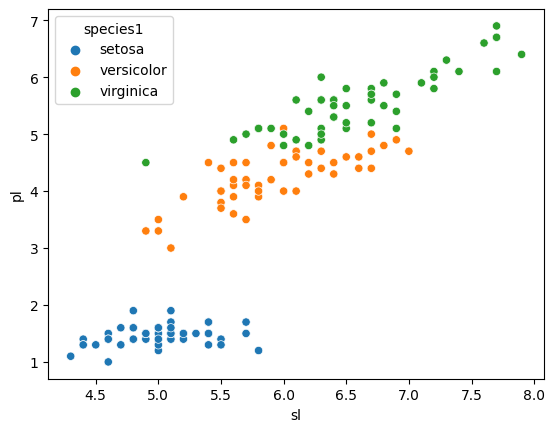

In [51]:
sns.scatterplot(x=df3_full.sl,y=df3_full.pl,hue=df3_full.species1)
plt.show()

The above graph shows relationship between the sepal length and width.It also shows that species setosa having
lesser petal lenght as compared to versicolor and verginica.  
Now we will check relationship between the petal length and width.

<Axes: xlabel='pl', ylabel='pw'>

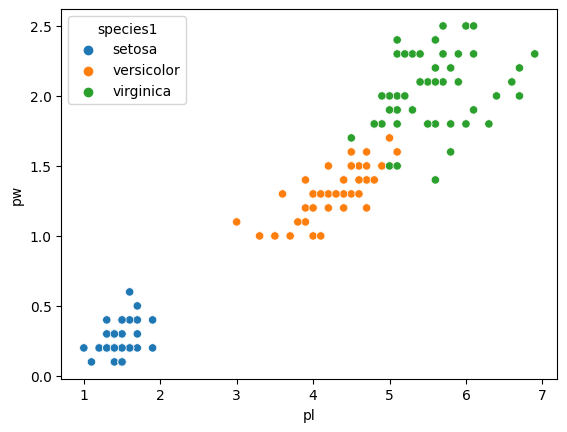

In [53]:
sns.scatterplot(x=df3_full.pl,y=df3_full.pw,hue=df3_full.species1)

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the
Petals can help in better and accurate Predictions over the Sepal. We will check that later.

<Axes: xlabel='sl', ylabel='pw'>

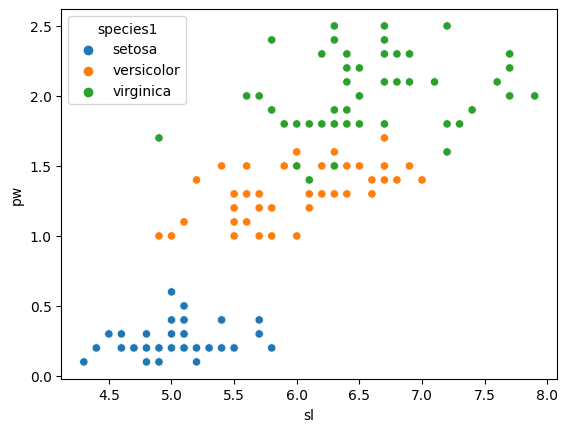

In [54]:
sns.scatterplot(x=df3_full.sl,y=df3_full.pw,hue=df3_full.species1)

<Axes: xlabel='sw', ylabel='pl'>

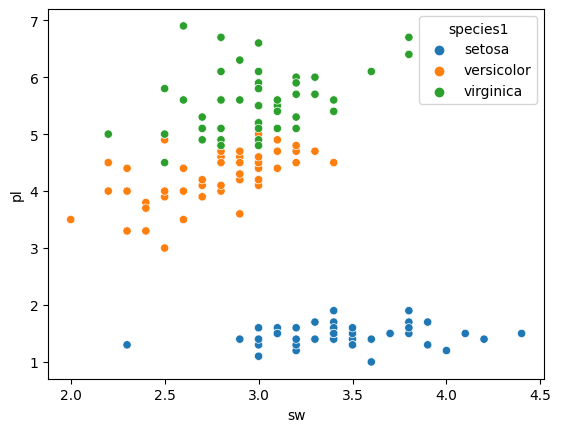

In [55]:
sns.scatterplot(x=df3_full.sw,y=df3_full.pl,hue=df3_full.species1)

From both above scatter plots we can clearly see that sw and pl data distribution and not represents specific pattern

In [56]:
df3_full.columns # check column names

Index(['Id', 'sl', 'sw', 'pl', 'pw', 'species1'], dtype='object')

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='pl', ylabel='Density'>

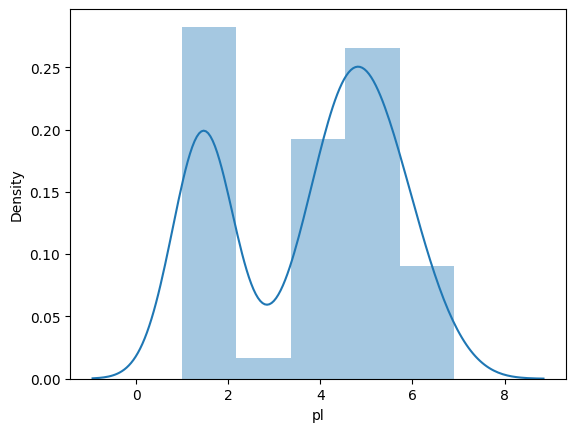

In [57]:
sns.distplot(df3_full.pl)

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='sl', ylabel='Density'>

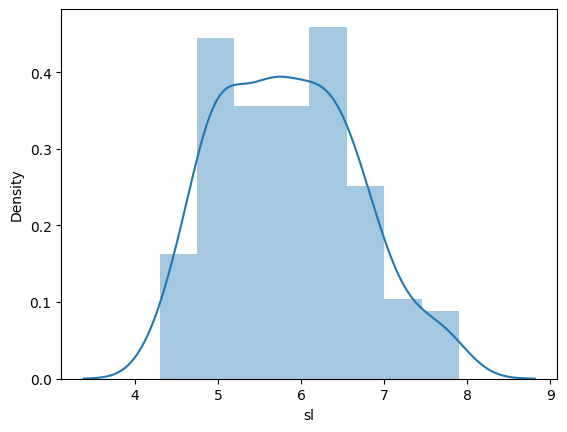

In [58]:
sns.distplot(df3_full.sl)

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='sw', ylabel='Density'>

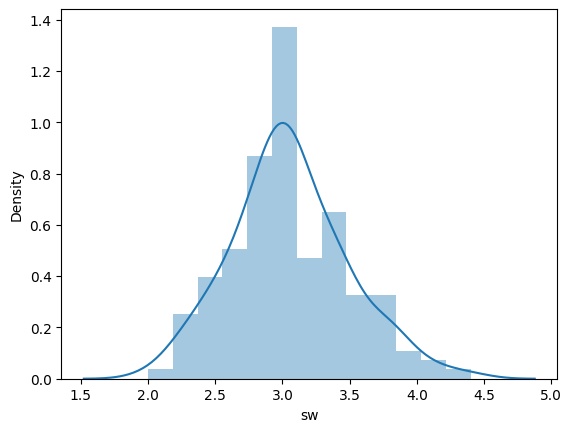

In [59]:
sns.distplot(df3_full.sw)

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='pw', ylabel='Density'>

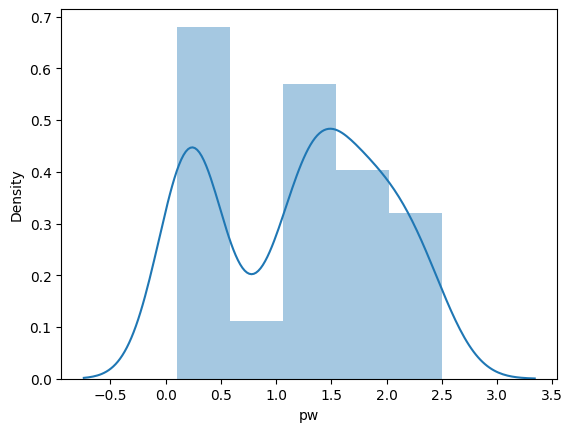

In [60]:
sns.distplot(df3_full.pw)

<Axes: xlabel='species1', ylabel='sw'>

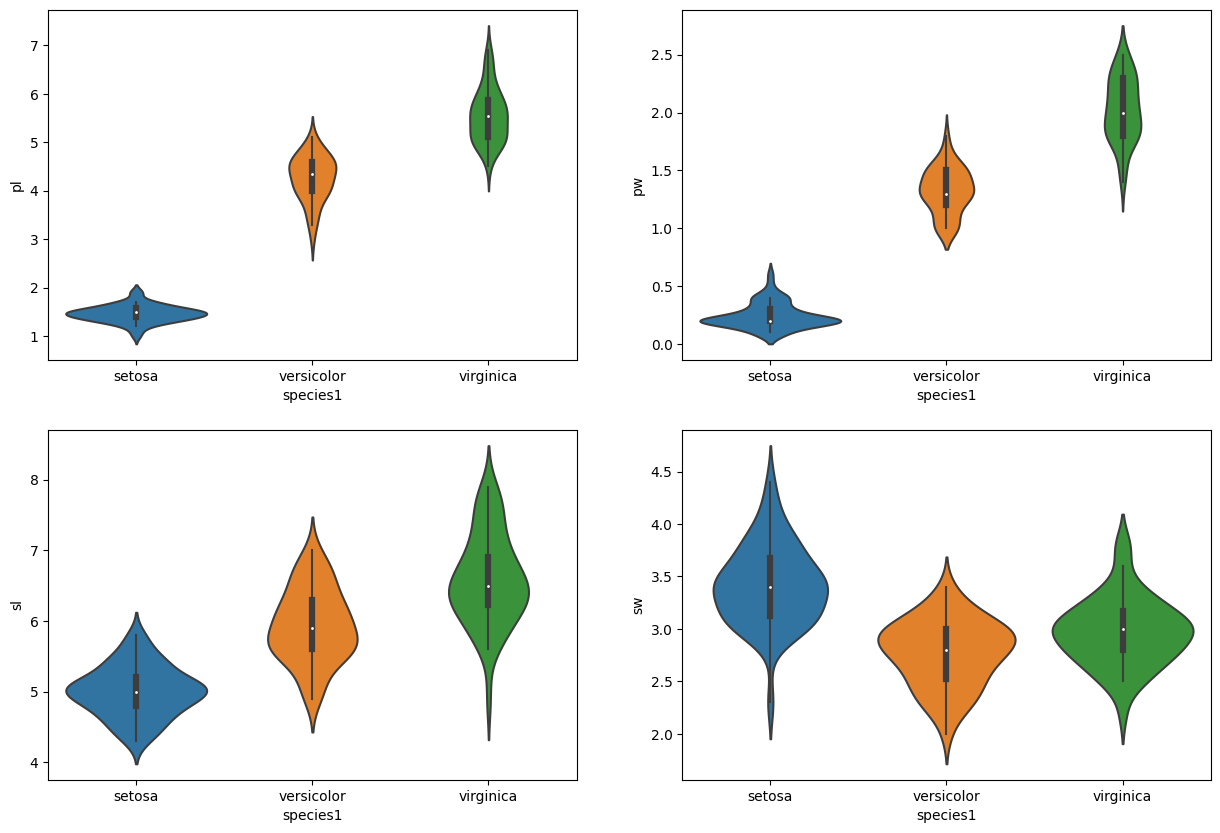

In [61]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species1',y='pl',data=df3_full)
plt.subplot(2,2,2)
sns.violinplot(x='species1',y='pw',data=df3_full)
plt.subplot(2,2,3)
sns.violinplot(x='species1',y='sl',data=df3_full)
plt.subplot(2,2,4)
sns.violinplot(x='species1',y='sw',data=df3_full)

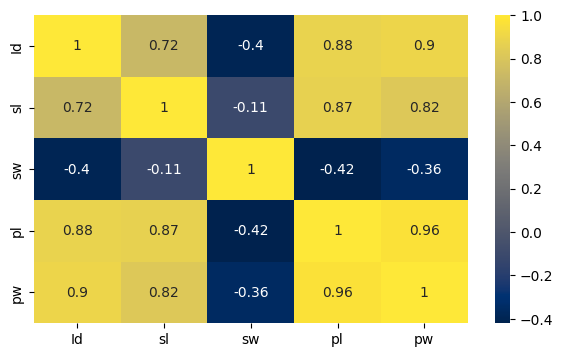

In [64]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df3_full.corr(),annot=True,cmap='cividis') 
plt.show()

Observation--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

In [65]:
#### convert categorical features into numerical feature

In [66]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
le.fit_transform(df3_full['species1'])
df3_full['species1']=le.fit_transform(df3_full['species1'])
df3_full

,Id,sl,sw,pl,pw,species1
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [67]:
df3_full

,Id,sl,sw,pl,pw,species1
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# Devide independent feat and target feat to train model

In [68]:
x = df3_full.iloc[:,:-1]
x

,Id,sl,sw,pl,pw
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [69]:
y = df3_full.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species1, Length: 150, dtype: int32

In [70]:
df3_full.species1.unique()

array([0, 1, 2])

In [71]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=20)

In [72]:
xtrain.shape,ytrain.shape

((105, 5), (105,))

In [73]:
xtest.shape,ytest.shape

((45, 5), (45,))

# Train model with LR,DT,RFC,XGBOOST,RF,KNN of classification techniques

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
logi = LogisticRegression()
logi.fit(xtrain,ytrain)
logi_prediction = logi.predict(xtest)
logi_prediction

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1,
       1])

In [75]:
print(logi.score(xtrain,ytrain)*100)
print(logi.score(xtest,ytest)*100)

100.0
100.0


In [76]:
accuracy_score(ytest,logi_prediction)*100

100.0

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
para = {'penalty':['l1','l2','elasticnet'],
        'C':[1,2,3,4,5,6,10,20,30,40,50,1.5,2.3,1.6,1.9],
        'max_iter':[100,200,300,50,70,60,50]
        }

In [80]:
classifier_logistic = GridSearchCV(logi,param_grid = para,scoring='accuracy',cv=5)

In [81]:
classifier_logistic.fit(xtrain,ytrain)

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Harish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 1.5, 2.3,
                               1.6, 1.9],
                         'max_iter': [100, 200, 300, 50, 70, 60, 50],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [82]:
classifier_logistic.best_estimator_

LogisticRegression(C=1)

# In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
##On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [84]:
classifier_logistic.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [85]:
classifier_logistic.best_score_

1.0

In [86]:
prediction = classifier_logistic.predict(xtest)
prediction

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1,
       1])

In [87]:
from sklearn.metrics import accuracy_score,classification_report
grid_logi_accuracy_score1 = accuracy_score(ytest,prediction)
grid_logi_accuracy_score1=(np.round(grid_logi_accuracy_score1*100))
grid_logi_accuracy_score1

100.0

In [88]:
confusion_matrix(ytest,prediction)

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 14]], dtype=int64)

In [89]:
class_pre_rec = classification_report(ytest,prediction)
print(class_pre_rec)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [90]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
tree_classifier = DecisionTreeClassifier(criterion='gini',
    splitter='best', 
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=1,
    random_state=1,
    max_leaf_nodes=2,
    class_weight='balanced',
    ccp_alpha=0.01,)

In [95]:
tree_classifier.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=5,
                       max_features=1, max_leaf_nodes=2, random_state=1)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [96]:
tree_classifier.score(xtrain,ytrain)

0.5714285714285714

In [97]:
tree_classifier.score(xtest,ytest)

0.4888888888888889

In [102]:
tree_classifier.predict(xtest)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0])

In [99]:
tree_pred=tree_classifier.predict(xtest)

In [100]:
from sklearn.metrics import confusion_matrix,classification_report

In [101]:
confusion_matrix(ytest,tree_pred)

array([[ 8,  5,  0],
       [ 4, 14,  0],
       [ 1, 13,  0]], dtype=int64)

In [103]:
print(classification_report(ytest,tree_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.44      0.78      0.56        18
           2       0.00      0.00      0.00        14

    accuracy                           0.49        45
   macro avg       0.35      0.46      0.39        45
weighted avg       0.35      0.49      0.40        45



C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
import sklearn

In [105]:
sklearn.metrics.get_scorer_names()

AttributeError: module 'sklearn.metrics' has no attribute 'get_scorer_names'

In [106]:
param_dict = {"criterion":['gini','entropy'],"max_depth":[1,2,3,4,5,6,7,None]}

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
grid = GridSearchCV(tree_classifier,param_grid=param_dict,n_jobs=-1)
grid

GridSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                              class_weight='balanced',
                                              max_depth=5, max_features=1,
                                              max_leaf_nodes=2,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [109]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                              class_weight='balanced',
                                              max_depth=5, max_features=1,
                                              max_leaf_nodes=2,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [110]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [111]:
grid.best_score_

0.5238095238095237

In [112]:
grid_pred2=grid.predict(xtest)

In [113]:
accuracy_score(ytest,grid_pred2)*100

48.888888888888886

In [114]:
from sklearn.metrics import confusion_matrix,classification_report

In [115]:
print(classification_report(ytest,grid_pred2))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.44      0.78      0.56        18
           2       0.00      0.00      0.00        14

    accuracy                           0.49        45
   macro avg       0.35      0.46      0.39        45
weighted avg       0.35      0.49      0.40        45



C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
print(classification_report(ytest,grid_pred2))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.44      0.78      0.56        18
           2       0.00      0.00      0.00        14

    accuracy                           0.49        45
   macro avg       0.35      0.46      0.39        45
weighted avg       0.35      0.49      0.40        45



C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn = KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=-1)

In [120]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [121]:
knn.score(xtrain,ytrain)

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [122]:
knn.score(xtest,ytest)

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [123]:
knn_pred=knn.predict(xtest)

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [124]:
accuracy_score(ytest,knn_pred)

1.0

In [125]:
confusion_matrix(ytest,knn_pred)

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 14]], dtype=int64)

In [126]:
accuracy_score(ytest,knn_pred)

1.0

In [127]:
print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
RFC=RandomForestClassifier(n_estimators=300,criterion='gini',
    max_depth=17,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_leaf_nodes=2,
    min_impurity_decrease=0.1,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=1,
    ccp_alpha=0.01,
    max_samples=3)

In [130]:
RFC.fit(xtrain,ytrain)

RandomForestClassifier(ccp_alpha=0.01, max_depth=17, max_features='sqrt',
                       max_leaf_nodes=2, max_samples=3,
                       min_impurity_decrease=0.1, n_estimators=300, n_jobs=-1,
                       random_state=1)

In [131]:
RFC.score(xtrain,ytrain)

0.9714285714285714

In [132]:
RFC.score(xtest,ytest)

0.9333333333333333

In [133]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'sqrt',
 'max_leaf_nodes': 2,
 'max_samples': 3,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [134]:
RFC_pred = RFC.predict(xtest)

In [135]:
accuracy_score(ytest,RFC_pred)

0.9333333333333333

In [136]:
confusion_matrix(ytest,RFC_pred)

array([[13,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 13]], dtype=int64)

In [137]:
print(classification_report(ytest,RFC_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.89      0.91        18
           2       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [141]:
pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [142]:
import xgboost as xg

In [143]:
xg_model = xg.XGBClassifier(gamma=0.01,
              learning_rate=0.01, max_bin=4,
              max_depth=15,
              max_leaves=2, min_child_weight=2,n_estimators=300, n_jobs=-1,objective='multi:softprob',
             random_state=1)

In [144]:
xg_model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=4,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=2,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [145]:
xg_model.score(xtrain,ytrain)

0.9809523809523809

In [146]:
xg_model.score(xtest,ytest)

0.8888888888888888

In [147]:
xg_pred =xg_model.predict(xtest)

In [148]:
accuracy_score(ytest,xg_pred)

0.8888888888888888

In [149]:
confusion_matrix(ytest,xg_pred)

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  5,  9]], dtype=int64)

In [150]:
print(classification_report(ytest,xg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.78      1.00      0.88        18
           2       1.00      0.64      0.78        14

    accuracy                           0.89        45
   macro avg       0.93      0.88      0.89        45
weighted avg       0.91      0.89      0.88        45



Observations:
    
Using Petals over Sepal for training the data gives a much better accuracy.
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.
Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features, I didn't cover some concepts as they would be relevant when we have many features.

I have compiled a notebook covering some advanced ML concepts using a larger dataset. Have a look at that tooo.

In above experiment,we have seen different accuracy with respect to different models like Logistic Regression,Decision Tree,Random Forest,XgBoost and KNN
Among all of them KNN provide best accuracy for the small dataset.So I will consider KNN as my final model having train and test are 98% and 95%.
As I mensioned I also play some hyperparameters for all models.
